In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='Malgun Gothic')

data=pd.read_csv("06_은행영업일.csv", encoding='cp949')
data['date']=pd.to_datetime(data['date'], format='%Y-%m-%d')
#data=data.set_index("date")
data.head()

,date,신고건수,공휴일,Week,월요일,화요일,수요일,목요일,금요일,토요일,...,확진자수,소비자물가지수,비트코인거래량,네이버_보이스피싱,다음카카오_보이스피싱,구글_보이스피싱,네이버_대출,다음카카오_대출,구글_대출검색,은행영업일
0,2020-01-01,0.0,0.0,1,0,0,1,0,0,0,...,0.0,100.09,420280.0,4.18055,7,2.25,11.31068,9,19.75,0.0
1,2020-01-02,29.0,0.0,1,0,0,0,1,0,0,...,0.0,100.09,632780.0,10.54166,12,2.25,26.11826,28,19.75,1.0
2,2020-01-03,31.0,0.0,1,0,0,0,0,1,0,...,0.0,100.09,936290.0,12.61111,14,2.25,22.39576,23,19.75,1.0
3,2020-01-04,6.0,1.0,1,0,0,0,0,0,1,...,0.0,100.09,523910.0,6.76388,11,2.25,12.65998,11,19.75,0.0
4,2020-01-05,2.0,1.0,1,0,0,0,0,0,0,...,0.0,100.09,628140.0,6.83333,8,2.25,13.93552,13,19.75,0.0


In [26]:
data.columns

Index(['date', '신고건수', '공휴일', 'Week', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일',
       '일요일', '휴일여부', '정기적_이벤트', '비정기적_이벤트', '뉴스개수', '금리', '누적확진자수', '확진자수',
       '소비자물가지수', '비트코인거래량', '네이버_보이스피싱', '다음카카오_보이스피싱', '구글_보이스피싱', '네이버_대출',
       '다음카카오_대출', '구글_대출검색', '은행영업일'],
      dtype='object')

* 데이터 상관관계 확인 및 히트맵 시각화

<AxesSubplot:>

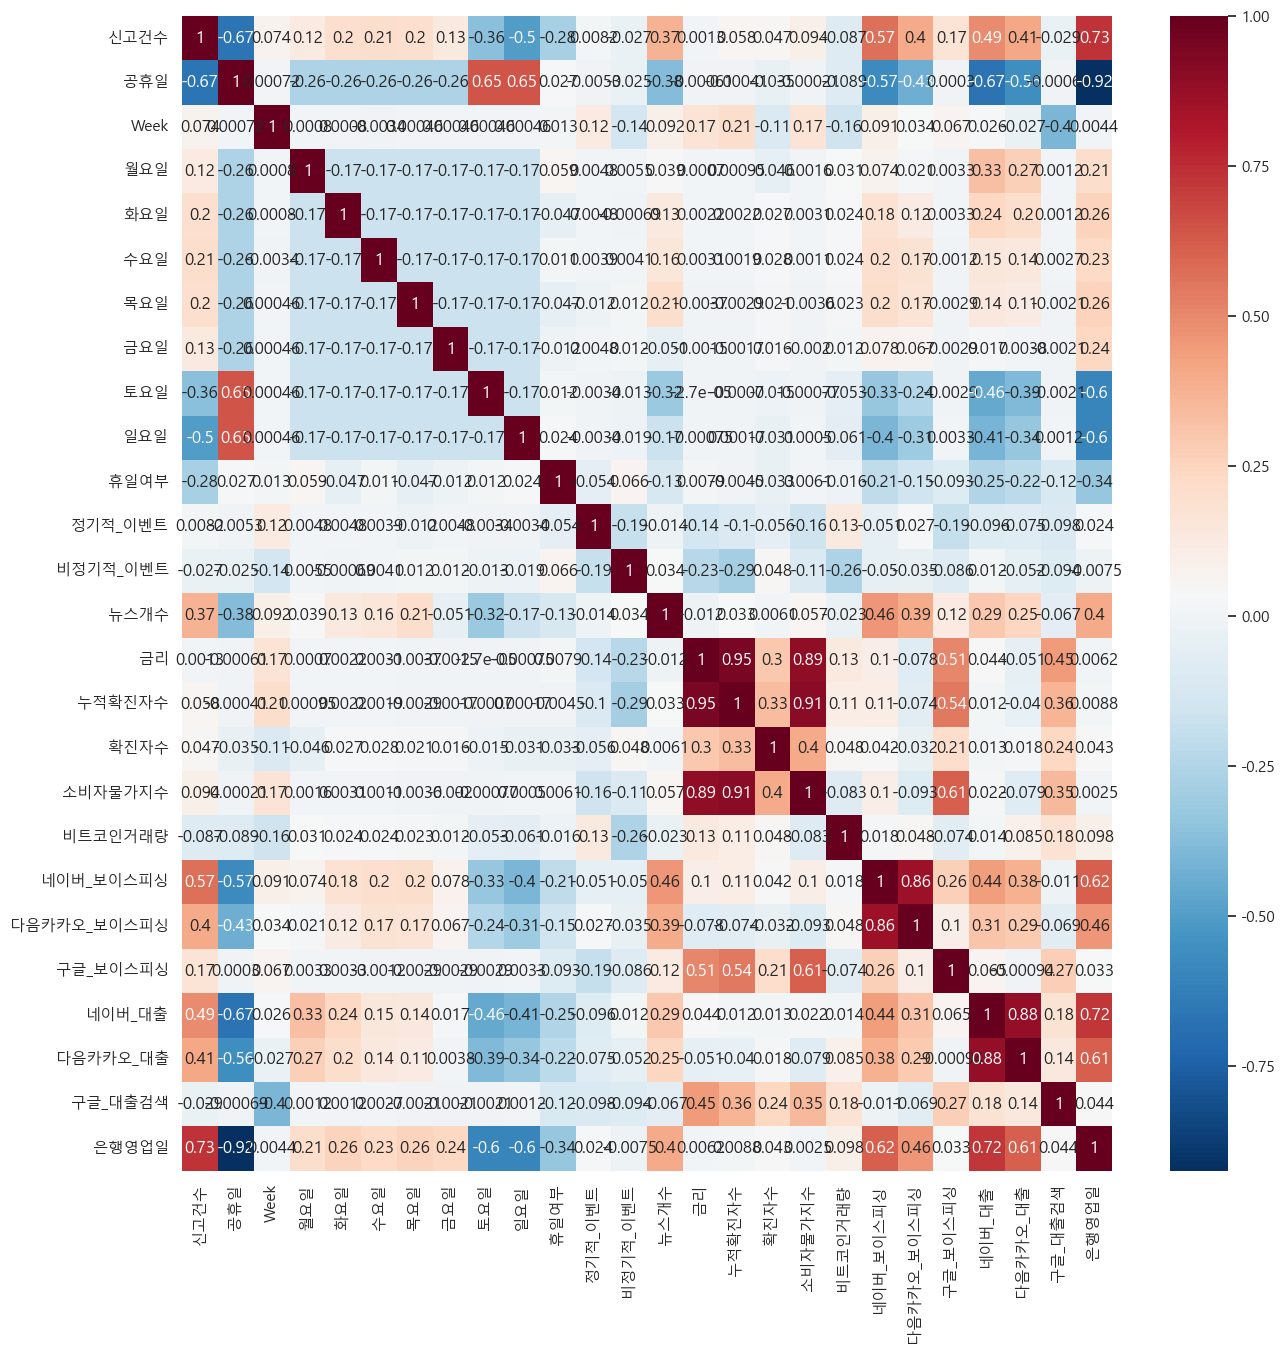

In [27]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='RdBu_r',annot=True)

- 포털 사이트 검색량 등 일부 컬럼은 N일째의 데이터를 예측할 때 N-1일 째의 데이터를 활용해야 하는 상황
- time index의 shift() 함수를 이용하여time index의 shift() 함수를 이용하여 구현

In [28]:
data.loc[:,['뉴스개수','누적확진자수','확진자수','비트코인거래량','네이버_보이스피싱', '다음카카오_보이스피싱','구글_보이스피싱', '네이버_대출','다음카카오_대출','구글_대출검색']]\
=data[['뉴스개수','누적확진자수','확진자수','비트코인거래량','네이버_보이스피싱', '다음카카오_보이스피싱', '구글_보이스피싱', '네이버_대출','다음카카오_대출', '구글_대출검색']].shift()
data.head()

,date,신고건수,공휴일,Week,월요일,화요일,수요일,목요일,금요일,토요일,...,확진자수,소비자물가지수,비트코인거래량,네이버_보이스피싱,다음카카오_보이스피싱,구글_보이스피싱,네이버_대출,다음카카오_대출,구글_대출검색,은행영업일
0,2020-01-01,0.0,0.0,1,0,0,1,0,0,0,...,NaN,100.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-01-02,29.0,0.0,1,0,0,0,1,0,0,...,0.0,100.09,420280.0,4.18055,7.0,2.25,11.31068,9.0,19.75,1.0
2,2020-01-03,31.0,0.0,1,0,0,0,0,1,0,...,0.0,100.09,632780.0,10.54166,12.0,2.25,26.11826,28.0,19.75,1.0
3,2020-01-04,6.0,1.0,1,0,0,0,0,0,1,...,0.0,100.09,936290.0,12.61111,14.0,2.25,22.39576,23.0,19.75,0.0
4,2020-01-05,2.0,1.0,1,0,0,0,0,0,0,...,0.0,100.09,523910.0,6.76388,11.0,2.25,12.65998,11.0,19.75,0.0


- 이전 7일의 신고건수 평균을 얻기 위한 rolling 작업
- N일의 데이터를 예측하기 위해서는 N-1, N-2, ..., N-7일의 신고건수를 활용해야 함.

In [29]:
data['계산용_신고건수']=data['신고건수'].shift()
data['이전7일건수_평균']=data['계산용_신고건수'].rolling(7).mean()
data=data.drop('계산용_신고건수',axis=1)
data.head(10)

,date,신고건수,공휴일,Week,월요일,화요일,수요일,목요일,금요일,토요일,...,소비자물가지수,비트코인거래량,네이버_보이스피싱,다음카카오_보이스피싱,구글_보이스피싱,네이버_대출,다음카카오_대출,구글_대출검색,은행영업일,이전7일건수_평균
0,2020-01-01,0.0,0.0,1,0,0,1,0,0,0,...,100.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2020-01-02,29.0,0.0,1,0,0,0,1,0,0,...,100.09,420280.0,4.18055,7.0,2.25,11.31068,9.0,19.75,1.0,NaN
2,2020-01-03,31.0,0.0,1,0,0,0,0,1,0,...,100.09,632780.0,10.54166,12.0,2.25,26.11826,28.0,19.75,1.0,NaN
3,2020-01-04,6.0,1.0,1,0,0,0,0,0,1,...,100.09,936290.0,12.61111,14.0,2.25,22.39576,23.0,19.75,0.0,NaN
4,2020-01-05,2.0,1.0,1,0,0,0,0,0,0,...,100.09,523910.0,6.76388,11.0,2.25,12.65998,11.0,19.75,0.0,NaN
5,2020-01-06,14.0,0.0,2,1,0,0,0,0,0,...,100.09,628140.0,6.83333,8.0,2.25,13.93552,13.0,19.75,1.0,NaN
6,2020-01-07,36.0,0.0,2,0,1,0,0,0,0,...,100.09,786750.0,13.86111,14.0,2.25,29.48934,34.0,19.75,1.0,NaN
7,2020-01-08,34.0,0.0,2,0,0,1,0,0,0,...,100.09,1010.0,14.51388,16.0,2.25,27.74089,29.0,19.75,1.0,16.857143
8,2020-01-09,38.0,0.0,2,0,0,0,1,0,0,...,100.09,1190.0,13.19444,18.0,2.25,25.10737,28.0,19.75,1.0,21.714286
9,2020-01-10,25.0,0.0,2,0,0,0,0,1,0,...,100.09,786500.0,12.87500,16.0,2.25,24.82103,23.0,19.75,1.0,23.000000


# 이전 7일 평균 피쳐 생성

In [30]:
before7=['뉴스개수','확진자수','비트코인거래량','네이버_보이스피싱', '다음카카오_보이스피싱','구글_보이스피싱', '네이버_대출','다음카카오_대출','구글_대출검색']
for i in range(len(before7)):
    temp='이전7일_'+before7[i]
    data.loc[:,temp]=data[before7[i]].rolling(7).mean()
data.head(10)

,date,신고건수,공휴일,Week,월요일,화요일,수요일,목요일,금요일,토요일,...,이전7일건수_평균,이전7일_뉴스개수,이전7일_확진자수,이전7일_비트코인거래량,이전7일_네이버_보이스피싱,이전7일_다음카카오_보이스피싱,이전7일_구글_보이스피싱,이전7일_네이버_대출,이전7일_다음카카오_대출,이전7일_구글_대출검색
0,2020-01-01,0.0,0.0,1,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29.0,0.0,1,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,31.0,0.0,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,6.0,1.0,1,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,2.0,1.0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-06,14.0,0.0,2,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-07,36.0,0.0,2,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-01-08,34.0,0.0,2,0,0,1,0,0,0,...,16.857143,3.142857,0.0,561308.571429,9.900789,11.714286,2.25,20.521490,21.000000,19.75
8,2020-01-09,38.0,0.0,2,0,0,0,1,0,0,...,21.714286,5.142857,0.0,501438.571429,11.188487,13.285714,2.25,22.492446,23.714286,19.75
9,2020-01-10,25.0,0.0,2,0,0,0,0,1,0,...,23.000000,6.000000,0.0,523398.571429,11.521821,13.857143,2.25,22.307127,23.000000,19.75


# 이전 4주(한 달) 피쳐 생성

In [31]:
data['계산용_영업일수']=data['은행영업일'].shift()
data['이전7일_은행영업일수']=data['계산용_영업일수'].rolling(7).sum()
data=data.drop(['계산용_영업일수'],axis=1)

In [32]:
before7=['뉴스개수','확진자수','비트코인거래량','네이버_보이스피싱', '다음카카오_보이스피싱','구글_보이스피싱', '네이버_대출','다음카카오_대출','구글_대출검색']
for i in range(len(before7)):
    temp='이전4주_'+before7[i]
    data.loc[:,temp]=data[before7[i]].rolling(28).mean()

In [33]:
data['계산용_신고건수']=data['신고건수'].shift()
data['이전4주건수_평균']=data['계산용_신고건수'].rolling(28).mean()
data=data.drop('계산용_신고건수',axis=1)

In [34]:
data.head(30)

,date,신고건수,공휴일,Week,월요일,화요일,수요일,목요일,금요일,토요일,...,이전4주_뉴스개수,이전4주_확진자수,이전4주_비트코인거래량,이전4주_네이버_보이스피싱,이전4주_다음카카오_보이스피싱,이전4주_구글_보이스피싱,이전4주_네이버_대출,이전4주_다음카카오_대출,이전4주_구글_대출검색,이전4주건수_평균
0,2020-01-01,0.0,0.0,1,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29.0,0.0,1,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,31.0,0.0,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,6.0,1.0,1,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,2.0,1.0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-06,14.0,0.0,2,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-07,36.0,0.0,2,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-01-08,34.0,0.0,2,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-01-09,38.0,0.0,2,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-01-10,25.0,0.0,2,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#data.to_csv('07_시계열적_컬럼구성.csv', encoding='cp949',index=False)

# 이상치 시각화 및 대치

<AxesSubplot:xlabel='신고건수', ylabel='Count'>

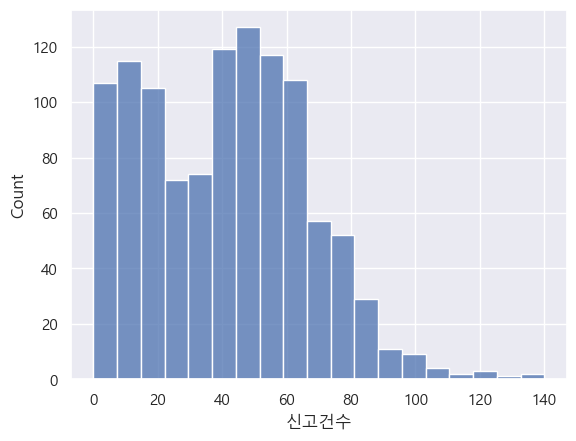

In [36]:
sns.histplot(data['신고건수'])

<AxesSubplot:xlabel='신고건수'>

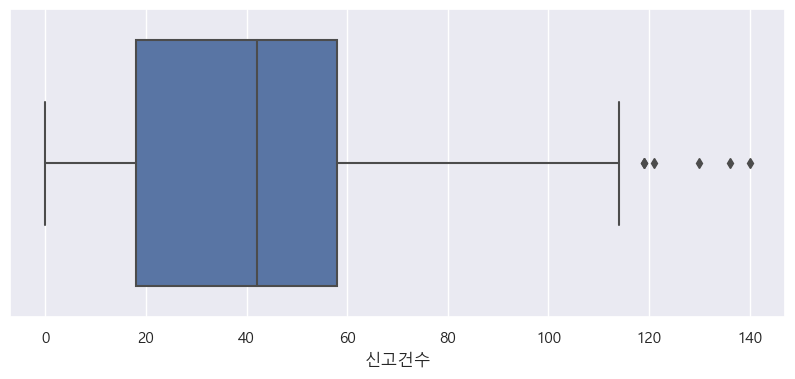

In [37]:
plt.figure(figsize=(10,4))
sns.boxplot(data['신고건수'])

<AxesSubplot:xlabel='신고건수', ylabel='Count'>

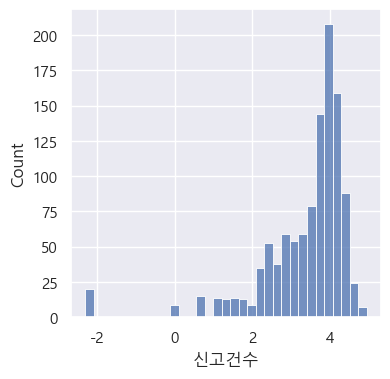

In [38]:
plt.figure(figsize=(4,4))
sns.histplot(np.log(data['신고건수']+0.1))

<AxesSubplot:xlabel='신고건수'>

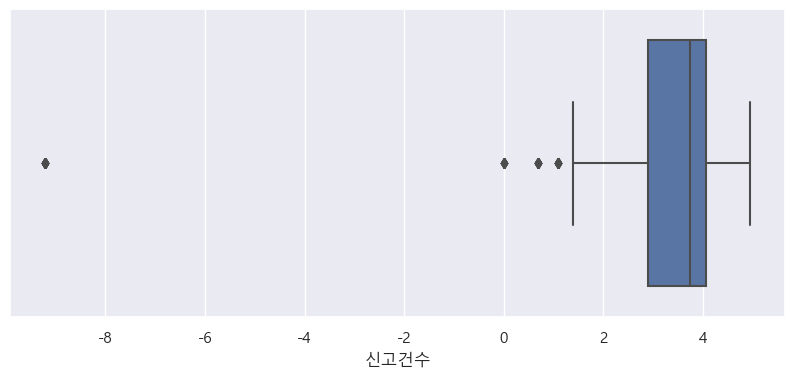

In [39]:
plt.figure(figsize=(10,4))
sns.boxplot(np.log(data['신고건수']+0.0001))

In [40]:
def outliers_iqr(dt,col):
    quartile_1,quartile_3=np.percentile(dt[col],[25,75])
    iqr=quartile_3-quartile_1
    lower_whis=quartile_1-(iqr*1.5)
    upper_whis=quartile_3+(iqr*1.5)
    outliers=dt[(dt[col]>upper_whis) | (dt[col]<lower_whis)]
    
    return outliers[[col]],lower_whis,upper_whis

In [41]:
temp,lower_whis,upper_whis=outliers_iqr(pd.DataFrame(data['신고건수']), '신고건수')
temp

,신고건수
257,121.0
258,130.0
259,140.0
260,136.0
261,119.0
314,119.0


In [42]:
lower_whis,upper_whis

(-42.0, 118.0)

In [43]:
temp_log,lower_whis,upper_whisg=outliers_iqr(pd.DataFrame(np.log(data['신고건수']+0.0001)), '신고건수')
temp_log['로그역변환']=np.exp(temp_log['신고건수']).apply(lambda x: int(x))
temp_log

,신고건수,로그역변환
0,-9.210340,0
4,0.693197,2
11,1.098646,3
18,0.000100,1
23,0.000100,1
24,0.693197,2
25,-9.210340,0
26,0.000100,1
32,1.098646,3
39,0.000100,1


In [44]:
lower_whis,upper_whis

(1.1352761815664236, 118.0)

In [45]:
data.loc[temp_log.index,'신고건수']=4
data.loc[temp.index,'신고건수']=118
data

,date,신고건수,공휴일,Week,월요일,화요일,수요일,목요일,금요일,토요일,...,이전4주_뉴스개수,이전4주_확진자수,이전4주_비트코인거래량,이전4주_네이버_보이스피싱,이전4주_다음카카오_보이스피싱,이전4주_구글_보이스피싱,이전4주_네이버_대출,이전4주_다음카카오_대출,이전4주_구글_대출검색,이전4주건수_평균
0,2020-01-01,4.0,0.0,1,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29.0,0.0,1,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,31.0,0.0,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,6.0,1.0,1,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,4.0,1.0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2023-01-14,12.0,1.0,2,0,0,0,0,0,1,...,14.464286,59824.642857,205554.642857,18.910709,15.000000,7.723214,27.167891,21.750000,21.883929,33.928571
1110,2023-01-15,9.0,1.0,2,0,0,0,0,0,0,...,14.357143,58746.071429,216044.642857,18.924102,15.071429,7.750000,27.361733,21.892857,22.000000,33.964286
1111,2023-01-16,23.0,0.0,3,1,0,0,0,0,0,...,13.464286,57807.071429,218955.714286,18.938983,15.107143,7.767857,27.526444,21.714286,22.062500,33.821429
1112,2023-01-17,23.0,0.0,3,0,1,0,0,0,0,...,13.142857,57361.428571,223581.785714,18.945432,15.250000,7.785714,27.780251,21.642857,22.125000,33.678571


In [ ]:
data.to_csv('08_7일&1달.csv', encoding='cp949')